##  Project: Predicting Customer Churn 

### Hypothesis
Null: There is no significant relationship between customer churn and subscribed contract term

Alternate: There is significant relationship between customer churn and chosen term of contract

### Business Questions

1. How does gender impact customer churn? Are there significant differences in churn rates between male and female customers?

2. Does the presence of a partner or dependents influence customer churn? Is there a relationship betweeen marital status and churn behavior?

3. How does the length of tenure affect churn rates? Are customers with longer tenures less likely to churn compared to new customes?

4. What role do additional services(e.g., online security, tech support, streaming TV, etc.) play in reducing customer churn? Are customers with more services less likey to churn?

5. Is there a correlation between the contract term (month-to-month, one year, two years) and churn rates? Are customers on long-term contracts less likely to churn compared to those on month-to-month contracts?



Importation of all necessary Libraries

In [1]:
#Libraries
import pyodbc
from  dotenv import dotenv_values    #import dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
from scipy import stats
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly.express as px
import openpyxl
warnings.filterwarnings("ignore")

Creation of environment variables to hide sensitive information and connect remotely to database

## 1. Data Loading

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [4]:
# Now create the sql query to get the data is what what you see below. 

query1 = "Select * from  dbo.LP2_Telco_churn_first_3000"

In [5]:
#Run the query wih aid of the connection and convert the target data_1 into a dataframe
data_1 = pd.read_sql(query1, connection)

In [6]:
#Preview of the first five rows of the data_1 DataFrame 
data_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
#Information summary of data_1
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [8]:
#Loading of data_2
data_2 =pd.read_csv(r'C:\Users\WORLDAX COMPUTERS\Python Projects\LP_2-Data_Analytics_Project\Telecommunications-Churn-Analysis\Datasets\LP2_Telco-churn-last-2000.csv')
#Preview of first five rows in data_2
data_2.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [9]:
#Information summary of Data_2
#This dataset doesn't have missing values
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [10]:
#Loading of the test data set
test_data = pd.read_excel(r'C:\Users\WORLDAX COMPUTERS\Python Projects\LP_2-Data_Analytics_Project\Telecommunications-Churn-Analysis\Datasets\Telco-churn-second-2000.xlsx')
#Preview of the first few rows
test_data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55


In [11]:
#Information summary of the test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


Shapes of Dataframes

In [12]:
print(data_1.shape, data_2.shape, test_data.shape)

(3000, 21) (2043, 21) (2000, 20)


In [13]:
# Compare the two DataFrames data_1 and data_2 side-by-side
#This dataframes form the training dataset

# Create custom summary DataFrames for each DataFrame
summary_data1 = pd.DataFrame({'Column Name': data_1.columns, 'Data Type': data_1.dtypes, 'Non-Null Count': data_1.count()})
summary_data2 = pd.DataFrame({'Column Name': data_2.columns, 'Data Type': data_2.dtypes, 'Non-Null Count': data_2.count()})

# Set 'Column Name' as the index for both summary DataFrames
summary_data1.set_index('Column Name', inplace=True) 
summary_data2.set_index('Column Name', inplace=True)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_data1, summary_data2], axis=1, keys=['DataFrame 1', 'DataFrame 2'])

# Print the side-by-side comparison
print(comparison)

#There are different data types in the two columns
#Dataframe 2 has no missing values

                 DataFrame 1                DataFrame 2               
                   Data Type Non-Null Count   Data Type Non-Null Count
Column Name                                                           
customerID            object           3000      object           2043
gender                object           3000      object           2043
SeniorCitizen           bool           3000       int64           2043
Partner                 bool           3000      object           2043
Dependents              bool           3000      object           2043
tenure                 int64           3000       int64           2043
PhoneService            bool           3000      object           2043
MultipleLines         object           2731      object           2043
InternetService       object           3000      object           2043
OnlineSecurity        object           2349      object           2043
OnlineBackup          object           2349      object           2043
Device

## 2. Data Cleaning
A. cleaning of dataframe data_1

In [14]:
#Information summary
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [15]:
#A preview of data in columns
data_1.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,3000,3000,3000,3000,3000,3000.000000,3000,2731,3000,2349,...,2349,2349,2349,2349,3000,3000,3000,3000.000000,2995.000000,2999
unique,3000,2,2,2,2,NaN,2,2,3,2,...,2,2,2,2,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,False,False,False,NaN,True,False,Fiber optic,False,...,False,False,False,True,Month-to-month,True,Electronic check,NaN,NaN,False
freq,1,1537,2525,1538,2070,NaN,2731,1437,1343,1478,...,1296,1476,1190,1199,1641,1776,1004,NaN,NaN,2219
mean,NaN,NaN,NaN,NaN,NaN,32.527333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.347400,2301.278315,NaN
std,NaN,NaN,NaN,NaN,NaN,24.637768,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.137053,2274.987884,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,18.799999,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.787499,415.250000,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.900002,1404.650024,NaN
75%,NaN,NaN,NaN,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.262501,3868.725098,NaN


In [16]:
#Check of unique values in each columnn of data_1
data_1.nunique()

customerID          3000
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1198
TotalCharges        2893
Churn                  2
dtype: int64

Check of Missing Values

In [17]:
# Create a loop to iterate over each column in the DataFrame
print('Count of missing values in data_1')
print()
for column in data_1.columns:
    # Use the 'isna()' method on the column to check for missing values
    missin_val = data_1[column].isna()

    # Calculate the sum of missin_val in the column
    missin_val_sum = missin_val.sum()

    # Check if any missin_val exist in the column
    if missin_val_sum > 0:
        print(f'Count of missing values in {column} column: {missin_val_sum}')

Count of missing values in data_1

Count of missing values in MultipleLines column: 269
Count of missing values in OnlineSecurity column: 651
Count of missing values in OnlineBackup column: 651
Count of missing values in DeviceProtection column: 651
Count of missing values in TechSupport column: 651
Count of missing values in StreamingTV column: 651
Count of missing values in StreamingMovies column: 651
Count of missing values in TotalCharges column: 5
Count of missing values in Churn column: 1


## Data Cleaning
Handling Inconsistency
Cleaning data_1 and data_2 data_types to avoid inconsistency

We will clean one column at a time in both dataframes


In [18]:
#Data_2 has no missing values
data_2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
#Comparison of the combined dataframe of data_1 and data_2
print(comparison)

                 DataFrame 1                DataFrame 2               
                   Data Type Non-Null Count   Data Type Non-Null Count
Column Name                                                           
customerID            object           3000      object           2043
gender                object           3000      object           2043
SeniorCitizen           bool           3000       int64           2043
Partner                 bool           3000      object           2043
Dependents              bool           3000      object           2043
tenure                 int64           3000       int64           2043
PhoneService            bool           3000      object           2043
MultipleLines         object           2731      object           2043
InternetService       object           3000      object           2043
OnlineSecurity        object           2349      object           2043
OnlineBackup          object           2349      object           2043
Device

### customerID column  

In [20]:
#Preview of values in both column
data_1['customerID'].head(3)

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
Name: customerID, dtype: object

#Both columns have consistent data of type object

In [21]:
data_2['customerID'].head(3)

0    5600-PDUJF
1    8292-TYSPY
2    0567-XRHCU
Name: customerID, dtype: object

### gender column

In [22]:
#Preview of both column elements
data_1['gender'].head(3)

0    Female
1      Male
2      Male
Name: gender, dtype: object

Both columns are okay and have object datatype

In [23]:
data_2['gender'].head(3)

0      Male
1      Male
2    Female
Name: gender, dtype: object

### SeniorCitizen column

In [24]:
#Preview of data in both column
data_1['SeniorCitizen'].tail(3)

2997     True
2998    False
2999    False
Name: SeniorCitizen, dtype: bool

Data_1 in this column is bool type and  data_2 column is an integer

In [25]:
data_2['SeniorCitizen'].tail(3)

2040    0
2041    1
2042    0
Name: SeniorCitizen, dtype: int64

In [26]:
#I will convert the integer datatype to boolean
data_2['SeniorCitizen'] = data_2['SeniorCitizen'].astype('bool')
#Are changes effected? Yeah!
data_2['SeniorCitizen'].tail(3)

2040    False
2041     True
2042    False
Name: SeniorCitizen, dtype: bool

### Partner column

In [27]:
#Preview of data in both columns
data_1['Partner'].tail(3)

2997     True
2998    False
2999     True
Name: Partner, dtype: bool

Data in both columns is inconsistent, data_1 is a bool type, whereas in data_2 is an object

In [28]:
data_2['Partner'].tail(3)

2040    Yes
2041    Yes
2042     No
Name: Partner, dtype: object

In [29]:
#Replace 'True', 'False' with 'Yes', 'No' respectively in data_1 to attain consistency
#This whether a cutomer has a partner or not. (Yes or No)
data_1['Partner'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Is the datatype changed? Yeah!
data_1['Partner'].head(3)

0    Yes
1     No
2     No
Name: Partner, dtype: object

### Cleaning Dependents column

In [30]:
#Preview of data in both columns
#Whether a partner has dependents or not(Yes or No)
data_1['Dependents'].tail(3)

2997    False
2998    False
2999     True
Name: Dependents, dtype: bool

Data_1 in this column is bool type and in data_2 is an object

In [31]:
data_2['Dependents'].tail(3)

2040    Yes
2041     No
2042     No
Name: Dependents, dtype: object

In [32]:
#I will change data_1 column to object type for consistency
#Replace 'True', 'False' with  'Yes', 'No' respectively
data_1['Dependents'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Is the datatype changed? Positive!
data_1['Dependents'].tail(4)

2996     No
2997     No
2998     No
2999    Yes
Name: Dependents, dtype: object

### tenure column 

In [33]:
#Preview of data in both tenure columns
data_1['tenure'].tail(3)

2997    69
2998     2
2999    19
Name: tenure, dtype: int64

Tenure column is consistent in both dataframes, datatype is of int64

In [34]:
data_2['tenure'].tail(3)

2040    11
2041     4
2042    66
Name: tenure, dtype: int64

### Cleaning PhoneServices column

In [35]:
#Preview of data in both columns
#Whether the customer has subscribed to receive phone services or not(Yes, No)
data_1['PhoneService'].head(3)

0    False
1     True
2     True
Name: PhoneService, dtype: bool

Data in both columns is inconsistent, in data_1 is of bool type, whereas in data_2 is an object

In [36]:
data_2['PhoneService'].head(3)

0    Yes
1    Yes
2     No
Name: PhoneService, dtype: object

In [37]:
#I will change data_1 column to object type for consistency
#Replace 'True', 'False' with 'Yes', 'No'  respectively

data_1['PhoneService'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Is the change effective? yes!
data_1['PhoneService'].head(3)

0     No
1    Yes
2    Yes
Name: PhoneService, dtype: object

### Cleaning MultipleLines column

data_1 multipleLines column has some missing values, whereas data_2 column doesn't

In [38]:
#Count of missing values in data_1 MultipleLines column
data_1['MultipleLines'].isna().sum()

269

In [39]:
#Preview of unique data in both columns
data_1['MultipleLines'].unique()

array([None, False, True], dtype=object)

In [40]:
data_1['MultipleLines'].value_counts()

MultipleLines
False    1437
True     1294
Name: count, dtype: int64

In [41]:
#Decided to impute missing in the column with mode value
#Mode value
multiplelines_mode = data_1['MultipleLines'].mode()[0]
#Replace missing values with the mode value
data_1['MultipleLines'].fillna(multiplelines_mode, inplace=True)
#Check whether there are any missing values left
data_1['MultipleLines'].isna().sum()

0

In [42]:
#count data in data_1 after changes
data_1['MultipleLines'].value_counts()

MultipleLines
False    1706
True     1294
Name: count, dtype: int64

In [43]:
data_2['MultipleLines'].value_counts()

MultipleLines
No                  987
Yes                 836
No phone service    220
Name: count, dtype: int64

Data in both MultipleLines columns is inconsistent

In [44]:
#Made assumption that an answer of 'No phone service' is the same as 'No' because the customer won't have even phone connection
#Replaced 'No phone service' with 'No'in the data_2 Multiplelines column
data_2['MultipleLines'].replace('No phone service', 'No', inplace=True)
#Check of data unique data count after changes
data_2['MultipleLines'].value_counts()

MultipleLines
No     1207
Yes     836
Name: count, dtype: int64

In [45]:
#Replace 'True', 'False' with 'Yes', 'No' respectively in data_1 to achieve uniformity

data_1['MultipleLines'].replace({True: 'Yes', False : 'No'}, inplace=True)
#Is the data type change effective? yeah!
data_1['MultipleLines'].tail(5)

2995     No
2996    Yes
2997    Yes
2998     No
2999     No
Name: MultipleLines, dtype: object

### InternetService column

In [46]:
#Preview of data in both columns
data_1['InternetService'].unique() 

array(['DSL', 'Fiber optic', 'No'], dtype=object)

Data in both dataframe columns is consistent and are of object type. #Both Column are ok!

In [47]:
data_2['InternetService'].unique() 

array(['DSL', 'Fiber optic', 'No'], dtype=object)

### Cleaning OnlineSecurity Column

Data_1 OnlineSecurity column has some missing values

In [48]:
#Preview of data in both column
#Whether the client has online security or not
#Data in the columns is inconsistent, data_1 has categories 'True' and 'False', whereas data_2 has 'Yes' and 'No'
data_1['OnlineSecurity'].unique() 

array([False, True, None], dtype=object)

In [49]:
#data_1 Online security column has some missing values
data_1['OnlineSecurity'].isna().sum()

651

In [50]:
#Count of unique numerical categories in data_1
data_1['OnlineSecurity'].value_counts()

OnlineSecurity
False    1478
True      871
Name: count, dtype: int64

In [51]:
#Made an assumption that the missing null values is a response to third option 'No internet service'. 
data_1['OnlineSecurity'].fillna('No internet service', inplace=True)
#Check of changes made
data_1['OnlineSecurity'].value_counts()

OnlineSecurity
False                  1478
True                    871
No internet service     651
Name: count, dtype: int64

In [52]:
data_2['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [53]:
#Count of unique numerical categories in data_2
data_2['OnlineSecurity'].value_counts()

OnlineSecurity
No                     1029
Yes                     585
No internet service     429
Name: count, dtype: int64

In [54]:
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['OnlineSecurity'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Is the change effective? yes!
data_1['OnlineSecurity'].tail(4)

2996                    Yes
2997                     No
2998                     No
2999    No internet service
Name: OnlineSecurity, dtype: object

### cleaning OnlineBackup column

In [55]:
#Whether the customer has OnlineBackupor not (Yes, No, No internet service)
#Check of unique elements  in column
data_1['OnlineBackup'].unique() 

array([True, False, None], dtype=object)

In [56]:
#data_1 OnlineBackup Clumn has some missing values
data_1['OnlineBackup'].isna().sum()

651

In [57]:
#Assumption made is that missing values represent the third option, 'No internet'
#Will fill missing values with 'No internet'
data_1['OnlineBackup'].fillna('No Internet', inplace=True)
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['OnlineBackup'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Are changes correct?
data_1['OnlineBackup'].value_counts()

OnlineBackup
No             1320
Yes            1029
No Internet     651
Name: count, dtype: int64

In [58]:
data_2['OnlineBackup'].unique() 

array(['No', 'Yes', 'No internet service'], dtype=object)

In [59]:
#For consistency, I will replace 'No internet service' in data_2 with 'No Internet' respectively.
data_2['OnlineBackup'].replace({'No internet service':'No Internet'}, inplace=True)
#Is the change effective? yes!
data_2['OnlineBackup'].value_counts()

OnlineBackup
No             911
Yes            703
No Internet    429
Name: count, dtype: int64

### Cleaning DeviceProtection column

In [60]:
#Check of unique elements in both columns
data_1['DeviceProtection'].unique() 

array([False, True, None], dtype=object)

In [61]:
#data_1 DeviceProtection Column has some missing values
data_1['DeviceProtection'].isna().sum()

651

In [62]:
data_2['DeviceProtection'].unique() 

array(['No', 'Yes', 'No internet service'], dtype=object)

In [63]:
#Assumption made is that missing values represent the third option, 'No internet'
#Will fill missing values with 'No internet'
data_1['DeviceProtection'].fillna('No internet service', inplace=True)
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['DeviceProtection'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Are changes correct?
data_1['DeviceProtection'].value_counts()

DeviceProtection
No                     1296
Yes                    1053
No internet service     651
Name: count, dtype: int64

### Cleaning TechSupport column

In [64]:
#Check of unique elements in both columns
#Whether the customer has TechSupport or not (Yes, No, No internet service)
data_1['TechSupport'].unique() 
 

array([False, True, None], dtype=object)

In [65]:
#data_1 TechSupport Column has some missing values
data_1['TechSupport'].isna().sum()

651

In [66]:
#There is some inconsistency in in both data
data_2['TechSupport'].unique() 

array(['Yes', 'No', 'No internet service'], dtype=object)

In [67]:
#Assumption made is that missing values represent the third option, 'No internet'
#Will fill missing values with 'No internet'
data_1['TechSupport'].fillna('No Internet', inplace=True)
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['TechSupport'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Are changes correct?
data_1['TechSupport'].value_counts()

TechSupport
No             1476
Yes             873
No Internet     651
Name: count, dtype: int64

In [68]:
#For consistency, I will replace 'No internet service' in data_2 with 'No Internet' respectively.
data_2['TechSupport'].replace({'No internet service':'No Internet'}, inplace=True)
#Is the change effective? yes!
data_2['TechSupport'].value_counts()

TechSupport
No             996
Yes            618
No Internet    429
Name: count, dtype: int64

### StreamingTV column

In [69]:
#Check of unique elements in both columns
data_1['StreamingTV'].unique() 

array([False, True, None], dtype=object)

In [70]:
#data_1 StreamingTV Column has some missing values
data_1['StreamingTV'].isna().sum()

651

In [71]:
#Both columns have some inconsistency as well
data_2['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [72]:
#Assumption made is that missing values represent the third option, 'No internet service'
#Will fill missing values with 'No internet'
data_1['StreamingTV'].fillna('No internet service', inplace=True)
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['StreamingTV'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Are changes correct?
data_1['StreamingTV'].value_counts()

StreamingTV
No                     1190
Yes                    1159
No internet service     651
Name: count, dtype: int64

### StreamingMovies column

In [73]:
#Check of unique elements in both columns
data_1['StreamingMovies'].unique() 

array([False, True, None], dtype=object)

In [74]:
#data_1 StreamingTV Column has some missing values
data_1['StreamingMovies'].isna().sum()

651

In [75]:
#Both columns have an inconsistency of having different data categories
data_2['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [76]:
#Assumption made is that missing values represent the third option, 'No internet service'
#Will fill missing values with 'No internet'
data_1['StreamingMovies'].fillna('No internet service', inplace=True)
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['StreamingMovies'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Are changes correct?
data_1['StreamingMovies'].value_counts()

StreamingMovies
Yes                    1199
No                     1150
No internet service     651
Name: count, dtype: int64

### Contract column

In [77]:
#Check of unique elements in both columns
data_1['Contract'].unique() 

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [78]:

#Both columns have consistent data values and are okay.
data_2['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

### Cleaning PaperlessBilling column


In [79]:
#Check of unique elements in both columns
data_1['PaperlessBilling'].unique() 


array([ True, False])

In [80]:
#There are some minor differences in both columns
#Data_1 is a bool and data_2 is an Object

data_2['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [81]:
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['PaperlessBilling'].replace({True: 'Yes', False: 'No'}, inplace=True)
#Is change effective? Great!
data_1['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

### PaymentMethod Column

In [82]:
#Check of unique elements in both columns
data_1['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [83]:
#Both columns are consistent and have similar categories
data_2['PaymentMethod'].unique()

array(['Credit card (automatic)', 'Electronic check', 'Mailed check',
       'Bank transfer (automatic)'], dtype=object)

### Cleaning MonthlyCharges column

There is some inconsistency in rounding off

In [84]:
#Check of few values in both columns
data_1['MonthlyCharges'].head()

0    29.850000
1    56.950001
2    53.849998
3    42.299999
4    70.699997
Name: MonthlyCharges, dtype: float64

In [85]:
data_2['MonthlyCharges'].head()

0     49.50
1     55.00
2     43.95
3     74.35
4    111.15
Name: MonthlyCharges, dtype: float64

In [86]:
#I will round off data_1 column values to 2 decimal points to attain consistency
data_1['MonthlyCharges'] = data_1['MonthlyCharges'].round(2)
data_1['MonthlyCharges'].head(3)

0    29.85
1    56.95
2    53.85
Name: MonthlyCharges, dtype: float64

### Cleaning TotalCharges column

There is some inconsistency in rounding off

data_1 Total charges column has 5 missing values

In [87]:
#Count of missing values in the column
data_1['TotalCharges'].isna().sum()

5

In [88]:
#Decided to drop the rows having missing data in my TotalCharges column - I have few missing values
data_1.dropna(subset='TotalCharges', inplace=True)
#Any remaining missing values?
data_1['TotalCharges'].isna().sum()

0

In [89]:
#Check of few values in both columns
data_1['TotalCharges'].head(3)

0      29.850000
1    1889.500000
2     108.150002
Name: TotalCharges, dtype: float64

In [90]:
#I will round off data_1 values to 2 decimal points
data_1['TotalCharges'] = data_1['TotalCharges'].round(2)
data_1['TotalCharges'].head(3)

0      29.85
1    1889.50
2     108.15
Name: TotalCharges, dtype: float64

In [91]:
data_2['TotalCharges'].head(3)

0     312.7
1    1046.5
2    2960.1
Name: TotalCharges, dtype: object

In [92]:
#Conversion of data_2 'Totalcharges' from object to float
#pd.to_numeric method converts data from object to float

data_2['TotalCharges'] = pd.to_numeric(data_2['TotalCharges'], errors='coerce').astype(float)

# Round the values to 2 decimal places
data_2['TotalCharges'] = data_2['TotalCharges'].round(2)
data_2['TotalCharges'].head(5)

0     312.7
1    1046.5
2    2960.1
3     834.2
4    6953.4
Name: TotalCharges, dtype: float64

### Cleaning Churn column

In [93]:
#Check of unique elements in both columns
data_1['Churn'].unique()

array([False, True, None], dtype=object)

In [94]:
#data_1 Churn Column has one missing value
data_1['Churn'].isna().sum()

1

In [95]:
#Decided to drop the rows having missing data in the Churn column
data_1.dropna(subset='Churn', inplace=True)
#is the row with missing value dropped? Yeah!
data_1['Churn'].isna().sum()

0

In [96]:
#A minor inconsistency is present, dataframe columns have different categories
data_2['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [97]:
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively. 

data_1['Churn'].replace({True : 'Yes', False : 'No'}, inplace=True)
data_1['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [98]:
#Checking the two dataframes after cleaning
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2994 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2994 non-null   object 
 1   gender            2994 non-null   object 
 2   SeniorCitizen     2994 non-null   bool   
 3   Partner           2994 non-null   object 
 4   Dependents        2994 non-null   object 
 5   tenure            2994 non-null   int64  
 6   PhoneService      2994 non-null   object 
 7   MultipleLines     2994 non-null   object 
 8   InternetService   2994 non-null   object 
 9   OnlineSecurity    2994 non-null   object 
 10  OnlineBackup      2994 non-null   object 
 11  DeviceProtection  2994 non-null   object 
 12  TechSupport       2994 non-null   object 
 13  StreamingTV       2994 non-null   object 
 14  StreamingMovies   2994 non-null   object 
 15  Contract          2994 non-null   object 
 16  PaperlessBilling  2994 non-null   object 
 17  

In [99]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   bool   
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [100]:
#Check of missing data in data_2 'TotalCharges' column

data_2['TotalCharges'].isna().sum()

3

In [101]:
#I will drop the rows with the 3 missing values in data_2
data_2 = data_2.dropna(axis=0)
#Are changes correctly made? Correct!
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2040 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2040 non-null   object 
 1   gender            2040 non-null   object 
 2   SeniorCitizen     2040 non-null   bool   
 3   Partner           2040 non-null   object 
 4   Dependents        2040 non-null   object 
 5   tenure            2040 non-null   int64  
 6   PhoneService      2040 non-null   object 
 7   MultipleLines     2040 non-null   object 
 8   InternetService   2040 non-null   object 
 9   OnlineSecurity    2040 non-null   object 
 10  OnlineBackup      2040 non-null   object 
 11  DeviceProtection  2040 non-null   object 
 12  TechSupport       2040 non-null   object 
 13  StreamingTV       2040 non-null   object 
 14  StreamingMovies   2040 non-null   object 
 15  Contract          2040 non-null   object 
 16  PaperlessBilling  2040 non-null   object 
 17  

In [102]:
#I will combine the two datasets(data_1 and data_2) into one dataset
df_combined = pd.concat([data_1, data_2], ignore_index=True)
#Will save a copy of combined data in my working directory
df_combined.to_csv('Clean_Train_Data.csv', index=False)

Loading Combined Training Data

In [103]:
#Use of pandas pd.read_csv method
df = pd.read_csv('Clean_Train_Data.csv')

#Preview of first few rows of the data
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,False,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,False,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [104]:
#Preview of information summary of my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5034 non-null   object 
 1   gender            5034 non-null   object 
 2   SeniorCitizen     5034 non-null   bool   
 3   Partner           5034 non-null   object 
 4   Dependents        5034 non-null   object 
 5   tenure            5034 non-null   int64  
 6   PhoneService      5034 non-null   object 
 7   MultipleLines     5034 non-null   object 
 8   InternetService   5034 non-null   object 
 9   OnlineSecurity    5034 non-null   object 
 10  OnlineBackup      5034 non-null   object 
 11  DeviceProtection  5034 non-null   object 
 12  TechSupport       5034 non-null   object 
 13  StreamingTV       5034 non-null   object 
 14  StreamingMovies   5034 non-null   object 
 15  Contract          5034 non-null   object 
 16  PaperlessBilling  5034 non-null   object 


In [105]:
#Description of numerical data in the columns(Measure of central tendency)
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,5034.000000,5034.000000,5034.000000
mean,32.620580,65.107251,2300.954758
std,24.511015,30.068019,2268.346401
min,1.000000,18.400000,18.800000
25%,9.000000,35.800000,417.662500
50%,29.000000,70.600000,1401.000000
75%,56.000000,90.050000,3860.600000
max,72.000000,118.650000,8670.100000


## Exploratory Data Analysis: EDA

### Univariate Analysis

##### Distribution of Gender

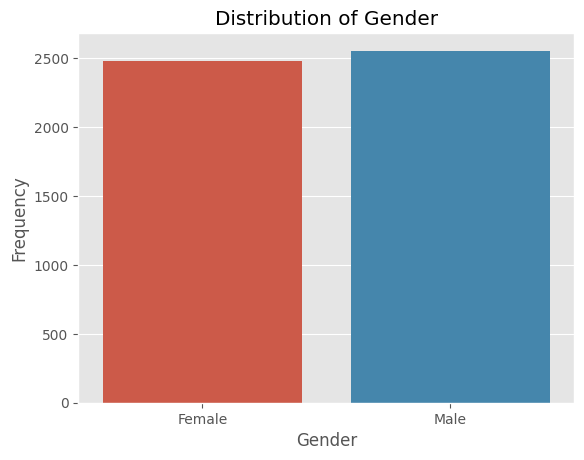

In [106]:
#Plot of Gender Distribution
sns.countplot(x=df['gender'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

Gender distribution is almost even, with Males exceeding females by a very small margin

##### Distribution of Total Charges 

In [107]:
#Summary description
df['TotalCharges'].describe()

count    5034.000000
mean     2300.954758
std      2268.346401
min        18.800000
25%       417.662500
50%      1401.000000
75%      3860.600000
max      8670.100000
Name: TotalCharges, dtype: float64

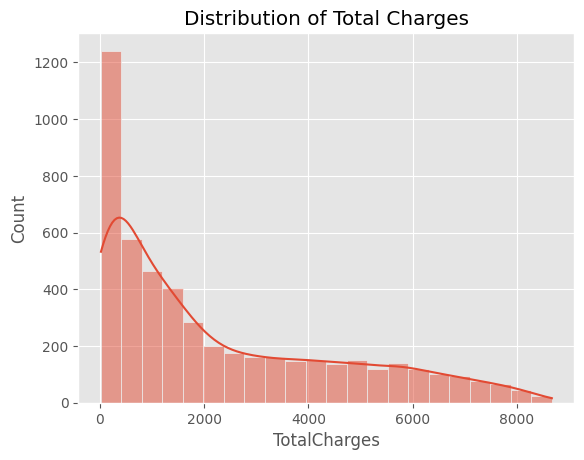

In [108]:
#Creation of a Histogram using seaborn
#sns.histplot(data=df['TotalCharges], kde=True)

sns.histplot(data=df['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges');

The above visualization depicts that charges below 2000 had highest frequency and most charged to the customers of the telecommunications company. The total charged values are skewed and have high variability/range.

##### Distribution of Monthly Charges

In [109]:
#Description summary
df['MonthlyCharges'].describe()

count    5034.000000
mean       65.107251
std        30.068019
min        18.400000
25%        35.800000
50%        70.600000
75%        90.050000
max       118.650000
Name: MonthlyCharges, dtype: float64

Text(0.5, 1.0, 'Distribution of Monthly Charges')

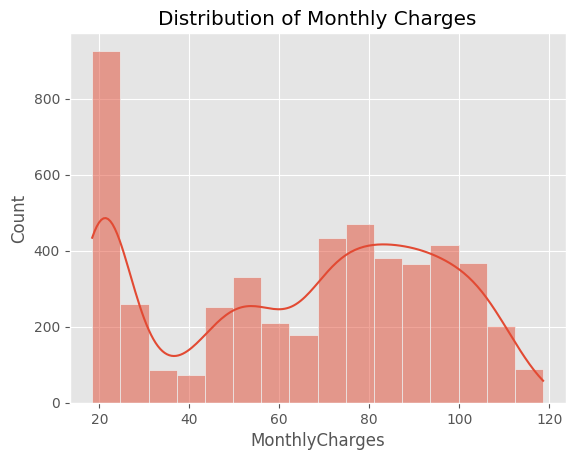

In [110]:
# Create the histogram plot of Monthly charges using seaborn

sns.histplot(data=df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')

Client Monthly charges of between 70 - 105 had the most consistent frequency for the telco company.

##### Distribution of Multiplelines 

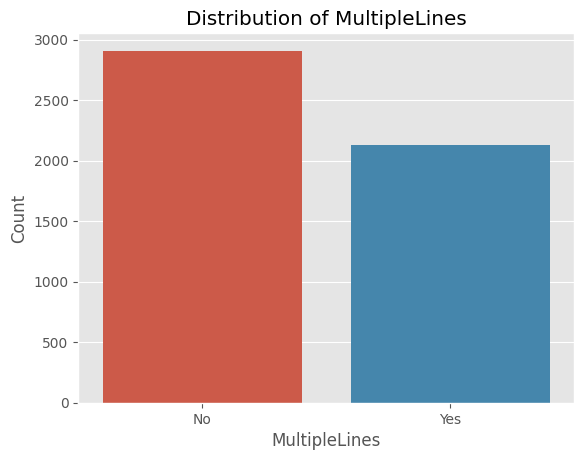

In [111]:
#Plot of Distribution on MultipleLines column
sns.countplot(x=df['MultipleLines'])
#plt.xlabel('Posession of MultipleLines')
plt.ylabel('Count')
plt.title('Distribution of MultipleLines')
plt.show()

Majority of the clients use only one line on their phones

Payment Method column

In [112]:
# Visualization of Payment Method column

PaymentMethod_Count = df['PaymentMethod'].value_counts().sort_values(ascending=True)
PaymentMethod_Count 

PaymentMethod
Credit card (automatic)      1089
Mailed check                 1123
Bank transfer (automatic)    1123
Electronic check             1699
Name: count, dtype: int64

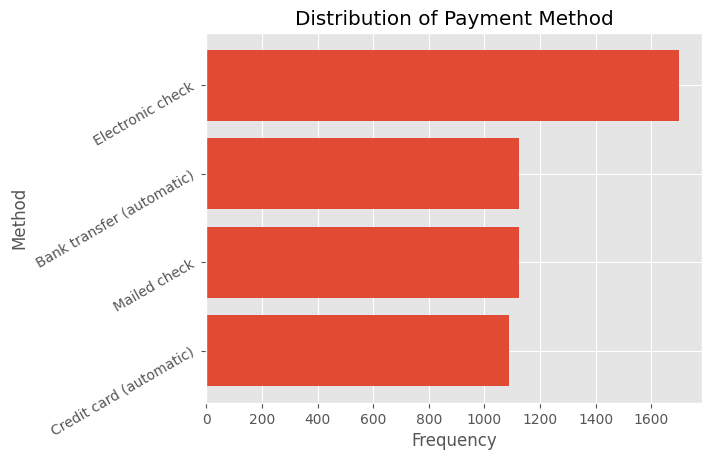

In [113]:
#Use of horizontal bar plot for visualization
#c = ['olive', 'peru','lightgreen','maroon']
plt.barh(PaymentMethod_Count.index, PaymentMethod_Count.values)
plt.xlabel('Frequency')
plt.ylabel('Method')
plt.title('Distribution of Payment Method')
plt.yticks(rotation=30)
plt.show();

Vizualization shows us that majority of the customers preffered Electronic Check as a method of payment.

 ##### InternetService Column

In [114]:
# Visualization of InternetService column
df['InternetService'].replace('No', 'No Internet Service', inplace=True)

InternetService_Count = df['InternetService'].value_counts().sort_values(ascending=True)
InternetService_Count 

InternetService
No Internet Service    1077
DSL                    1710
Fiber optic            2247
Name: count, dtype: int64

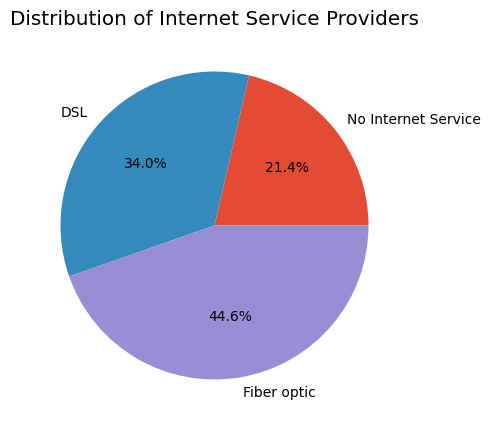

In [115]:
#Plotting a pie chart
#Should discuss with my team what'No' represents

plt.figure(figsize=(5, 5))
plt.pie(InternetService_Count, labels=InternetService_Count.index, autopct='%1.1f%%')
plt.title('Distribution of Internet Service Providers')
plt.show();

Majority of customer's preffered Fibre optic for internet service provision

 ##### Contract column

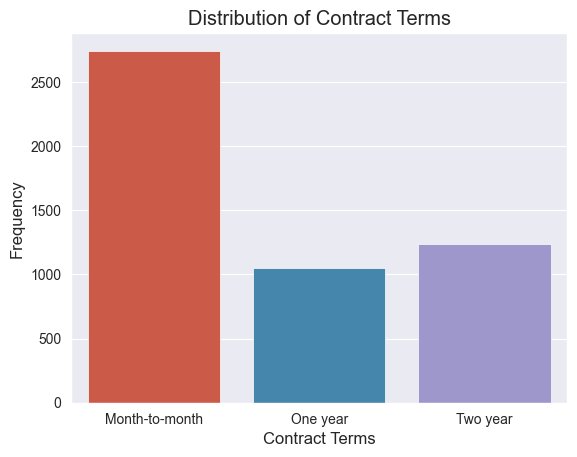

In [116]:
#Use of count plot for visualization
sns.set_style('darkgrid')
sns.countplot(data=df, x='Contract')
plt.xlabel('Contract Terms')
plt.ylabel('Frequency')
plt.title('Distribution of Contract Terms')
#plt.xticks(rotation=25)
plt.show();

Majority of clients preffered Month-to-month contract terms

##### Dependents column

In [117]:
#Vizualization of dependents using plotly.express

fig = px.pie(df, names='Dependents', title='Distribution of Dependents')
font_style = {'family':'Arial', 'size':18, 'color':'black'}
#customize title font
fig.update_layout(title_font=font_style, title_x=0.5)
#Customize text inside pie chart
fig.update_traces(textfont=font_style)
#Customize legend
fig.update_layout(legend=dict(font=dict(font_style)))
fig.show()

In [118]:
# Get the value counts of 'SeniorCitizen' column
senior_citizen_counts = df['SeniorCitizen'].value_counts()

# Create a DataFrame for plotting
data = pd.DataFrame({'Citizen': ['Non-Senior Citizen', 'Senior Citizen'],
                     'Count': senior_citizen_counts})

# Create a pie chart using plotly express
fig = px.pie(data, values='Count', names='Citizen',
             color_discrete_sequence=['#009ACD', '#ADD8E6'],
             title='Distribution of Senior Citizens')

# Move the title to the center
fig.update_layout(title_x=0.5)

# Show the plot
fig.show()

Majority of the customers had no dependents 

### Bivariate Analysis

In [119]:
#fig = px.violin(df, x='Dependents', y='TotalCharges', color='Dependents', points='all', box=True, title='Relationship between Tenure and Churn')
#show the plot#
#fig.show()

##### Relationship between total charges and tenure

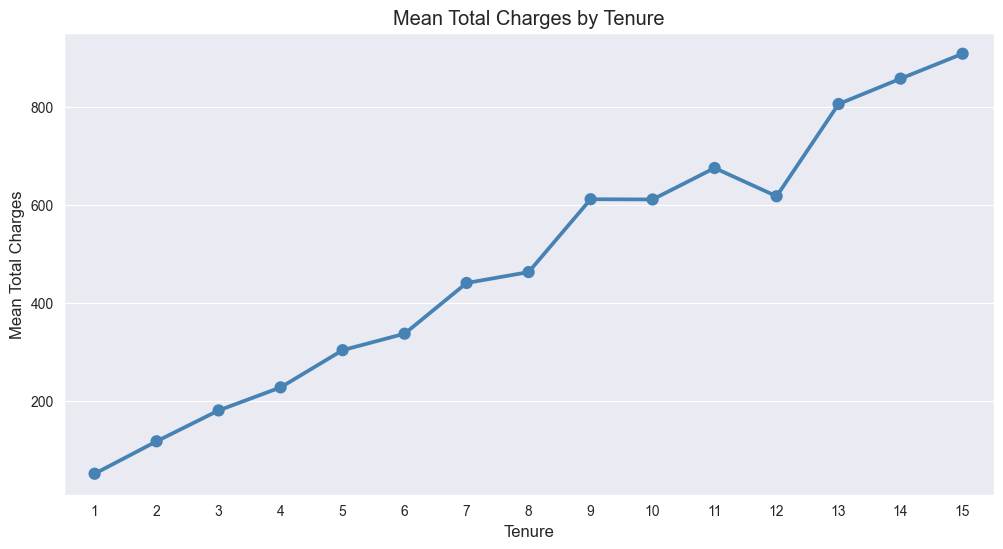

In [120]:
# Grouping by 'tenure' and calculating the mean 'TotalCharges'
df_grp_tenure = df.groupby('tenure')['TotalCharges'].mean().reset_index()

#Top 15 data points
df_grp_tenure_15 = df_grp_tenure.head(15)

# Create a point plot
plt.figure(figsize=(12, 6))
sns.pointplot(data=df_grp_tenure_15, x='tenure', y='TotalCharges', color='steelblue')

# Customize the plot
plt.title('Mean Total Charges by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Mean Total Charges')

# Show the plot
plt.show()

Check on collinearity. There is a strong collinearity between tenure and Total charges.

##### Relationship of Tenure and Churn 

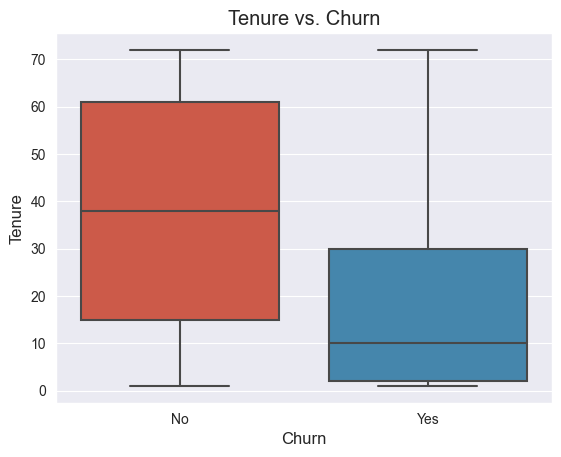

In [121]:
#  Bivariate Analysis - Tenure vs. Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

The visualization shows that clients with a lower tenure had the highest likelihood to churn

##### Monthly charges vs Tenure

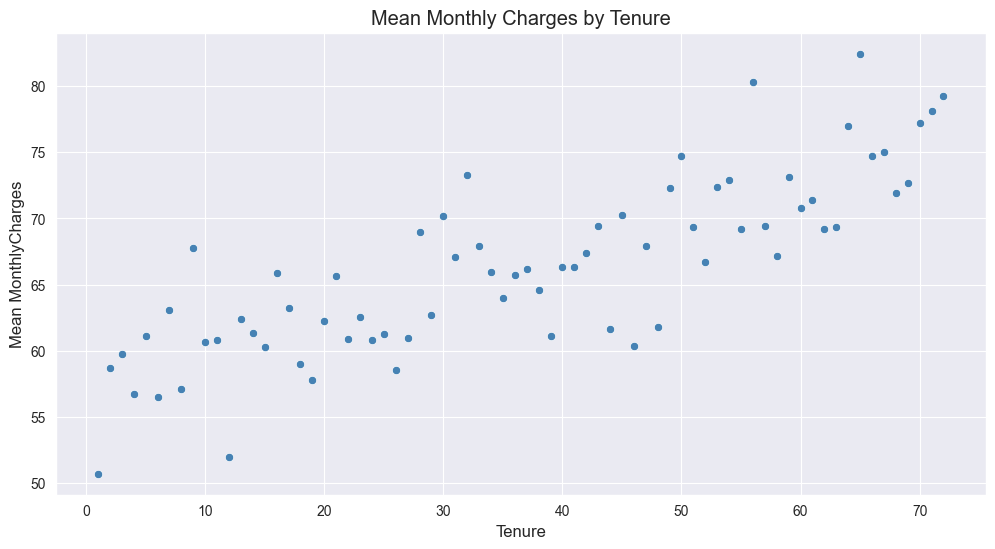

In [122]:
# Grouping by 'tenure' and calculating the mean 'MonthlyCharges'
df_grp_tenure = df.groupby('tenure')['MonthlyCharges'].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_grp_tenure, x='tenure', y='MonthlyCharges', color='steelblue')

# Customize the plot
plt.title('Mean Monthly Charges by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Mean MonthlyCharges')

# Show the plot
plt.show()

There is a linear relationship between tenure and Monthly charges. Clients who are loyal and had a long tenure made higher monthly purchases from the telecommunications company.

##### Contract vs Churn rate

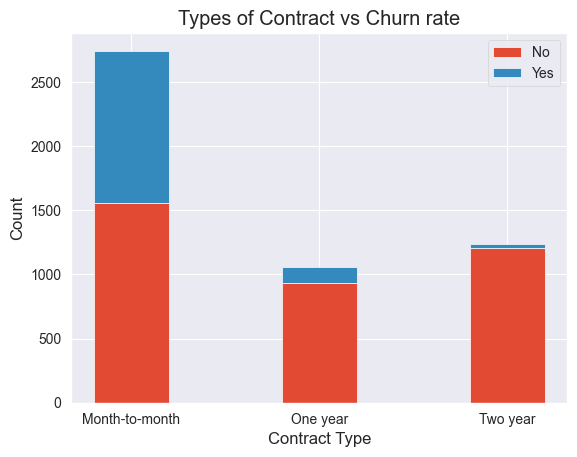

In [123]:
# Grouping and counting occurrences of each combination
grouped_df = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
fig, ax = plt.subplots()

index = range(len(grouped_df))
width = 0.4

bars = []
bottom = [0] * len(grouped_df)

for churn_status in grouped_df.columns:
    bar = ax.bar(index, grouped_df[churn_status], width, bottom=bottom, label=churn_status)
    bars.append(bar)
    bottom = [bottom[i] + grouped_df[churn_status][i] for i in range(len(grouped_df))]

ax.set_xlabel('Contract Type')
ax.set_ylabel('Count')
ax.set_title('Types of Contract vs Churn rate')
ax.set_xticks(index)
ax.set_xticklabels(grouped_df.index)
ax.legend()

plt.show()

### Multivariate Analysis

Rekationship between Monthly charges, Contract terms, and churn

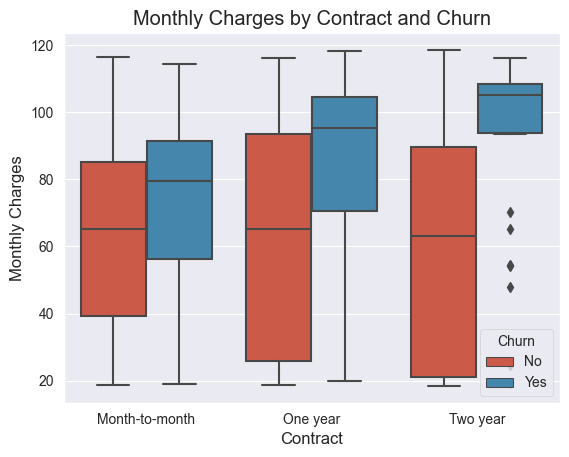

In [124]:
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges by Contract and Churn')
plt.xlabel('Contract')
plt.ylabel('Monthly Charges')
plt.show()

The box plot that helps visualize how the monthly charges are distributed across different types of contracts, considering the churn status of customers. The plot provides insights into whether there are significant variations in monthly charges based on contract types and churn behavior

##### 1.How does gender impact customer churn? Are there siginificant differences in churn rates between male and female customers?

In [125]:
# Since the  gender column contains 'Male' and 'Female', convert it to categorical data
df['gender'] = pd.Categorical(df['gender'])

#'Churn' column contains non-numeric values like 'Yes' and 'No'
# Convert 'churn' column to binary numeric values (0 for 'No', 1 for 'Yes')
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [126]:
# Grouping by 'gender' and summing the 'Churn' column for each group
grouped_churn_sum = df.groupby('gender')['Churn'].sum()

# Getting the grouped sum of clients who will not churn
grouped_no_churn_sum = df.groupby('gender')['Churn'].apply(lambda x: (x == 0).sum())

# Getting the grouped sum of clients who will churn
grouped_yes_churn_sum = df.groupby('gender')['Churn'].apply(lambda x: (x == 1).sum())

# Displaying the results
print("Grouped sum of clients who will churn:")
print(grouped_yes_churn_sum)

print("\nGrouped sum of clients who will not churn:")
print(grouped_no_churn_sum)

Grouped sum of clients who will churn:
gender
Female    661
Male      675
Name: Churn, dtype: int64

Grouped sum of clients who will not churn:
gender
Female    1819
Male      1879
Name: Churn, dtype: int64


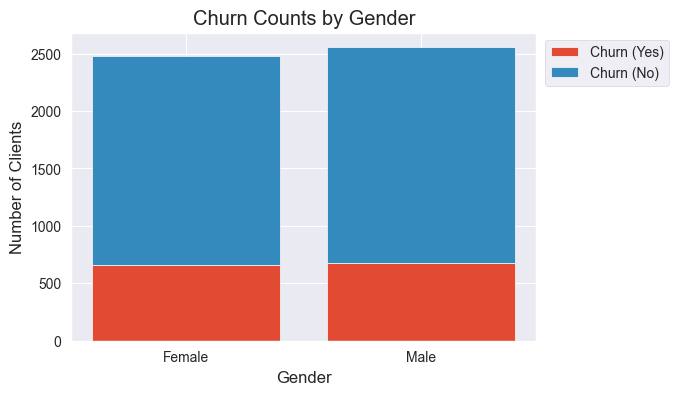

In [127]:
# List of genders for x-axis labels
genders = grouped_churn_sum.index

# Plotting the stacked bar chart
plt.figure(figsize=(6, 4))
plt.bar(genders, grouped_yes_churn_sum, label='Churn (Yes)')
plt.bar(genders, grouped_no_churn_sum, bottom=grouped_yes_churn_sum, label='Churn (No)')

plt.xlabel('Gender')
plt.ylabel('Number of Clients')
plt.title('Churn Counts by Gender')
plt.legend()

# Moving the legend outside of the bar plot
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.show()

##### 2. Does the presence of a partner or dependents influence customer churn? Is there a relationship betweeen marital status and churn behavior?

In [128]:
Churn_rates_by_partner = df.groupby('Partner')['Churn'].mean()

Churn_rates_by_dependents = df.groupby('Dependents')['Churn'].mean()

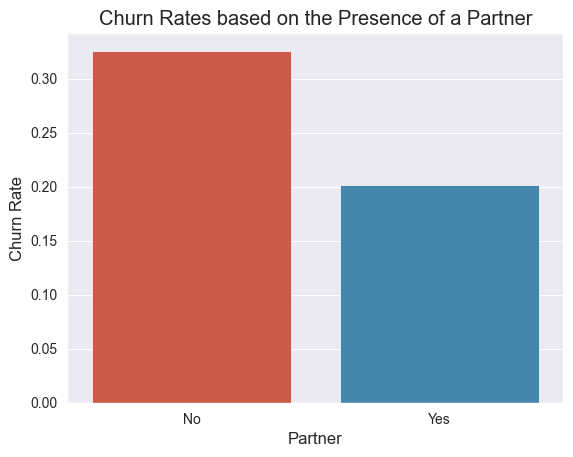

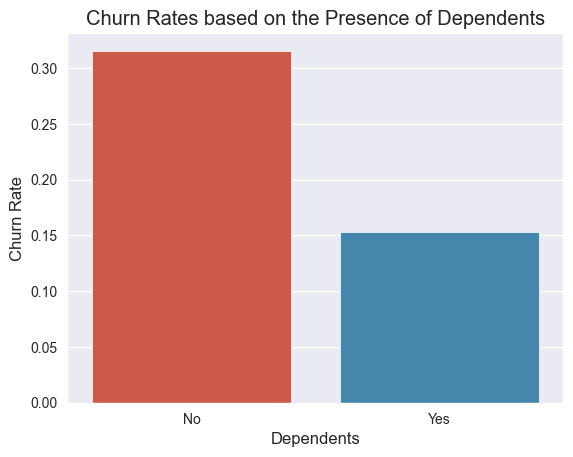

In [129]:
# Plot churn rates based on the presence of a partner
sns.barplot(x=Churn_rates_by_partner.index, y=Churn_rates_by_partner.values)
plt.title('Churn Rates based on the Presence of a Partner')
plt.xlabel('Partner')
plt.ylabel('Churn Rate')
plt.show()

# Plot churn rates based on the presence of dependents
sns.barplot(x=Churn_rates_by_dependents.index, y=Churn_rates_by_dependents.values)
plt.title('Churn Rates based on the Presence of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Churn Rate')
plt.show()

##### 3.How does the length of tenure affect churn rates? Are customers with longer tenures less likely to churn compared to new customes?

In [130]:
#'Tenure' column contains the length of tenure in months
# Create bins for tenure categories (e.g., 0-6 months, 7-12 months, etc.)
tenure_bins = [0, 6, 12, 24, 36, 48, 60, 1000]  # Adjust the bins as needed
tenure_labels = ['0-6 months', '7-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61+ months']
df['tenure_category'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels)

# Calculate churn rates for each tenure category
Churn_rates_by_tenure = df.groupby('tenure_category')['Churn'].mean()

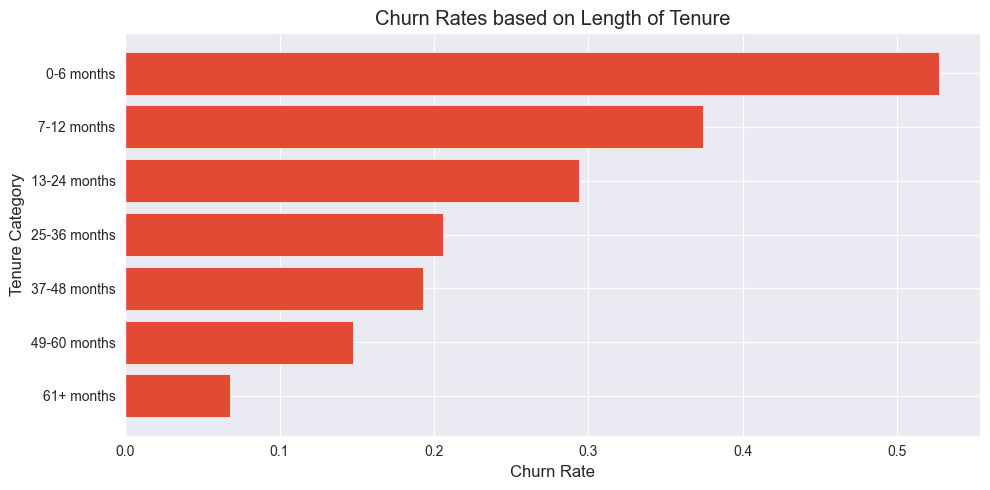

In [131]:
# # Vizualization of Churn rates based on the length of tenure

plt.figure(figsize=(10, 5))
plt.barh(Churn_rates_by_tenure.index,Churn_rates_by_tenure.values)
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest bar on top


plt.xlabel('Churn Rate')
plt.ylabel('Tenure Category')
plt.title('Churn Rates based on Length of Tenure')
plt.tight_layout()  # To prevent the labels from getting cut off
plt.show();

##### 4. What role do additional services(e.g., online security, tech support, streaming TV, etc.) play in reducing customer churn? Are customers with more services less likey to churn?

In [132]:
# Create bins for service categories (e.g., 0, 1, 2, etc.)
service_bins = [-1, 0, 1]  # Two categories: 0 for "No service", 1 for "Has service"
service_labels = ['No service', 'Has service']
df['Service_category_OnlineSecurity'] = pd.cut(df['OnlineSecurity'].map({'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['Service_category_TechSupport'] = pd.cut(df['TechSupport'].map({'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['Service_category_StreamingTV'] = pd.cut(df['StreamingTV'].map({'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['Service_category_StreamingMovies'] = pd.cut(df['StreamingMovies'].map({'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['Service_category_OnlineBackup'] = pd.cut(df['OnlineBackup'].map({'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['Service_category_DeviceProtection'] = pd.cut(df['DeviceProtection'].map({'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)

# Calculate churn rates for each service category
churn_rates_by_OnlineSecurity = df.groupby('Service_category_OnlineSecurity')['Churn'].mean()
churn_rates_by_TechSupport = df.groupby('Service_category_TechSupport')['Churn'].mean()
churn_rates_by_StreamingTV = df.groupby('Service_category_StreamingTV')['Churn'].mean()
churn_rates_by_StreamingMovies = df.groupby('Service_category_StreamingMovies')['Churn'].mean()
churn_rates_by_OnlineBackup = df.groupby('Service_category_OnlineBackup')['Churn'].mean()
churn_rates_by_DeviceProtection = df.groupby('Service_category_DeviceProtection')['Churn'].mean()

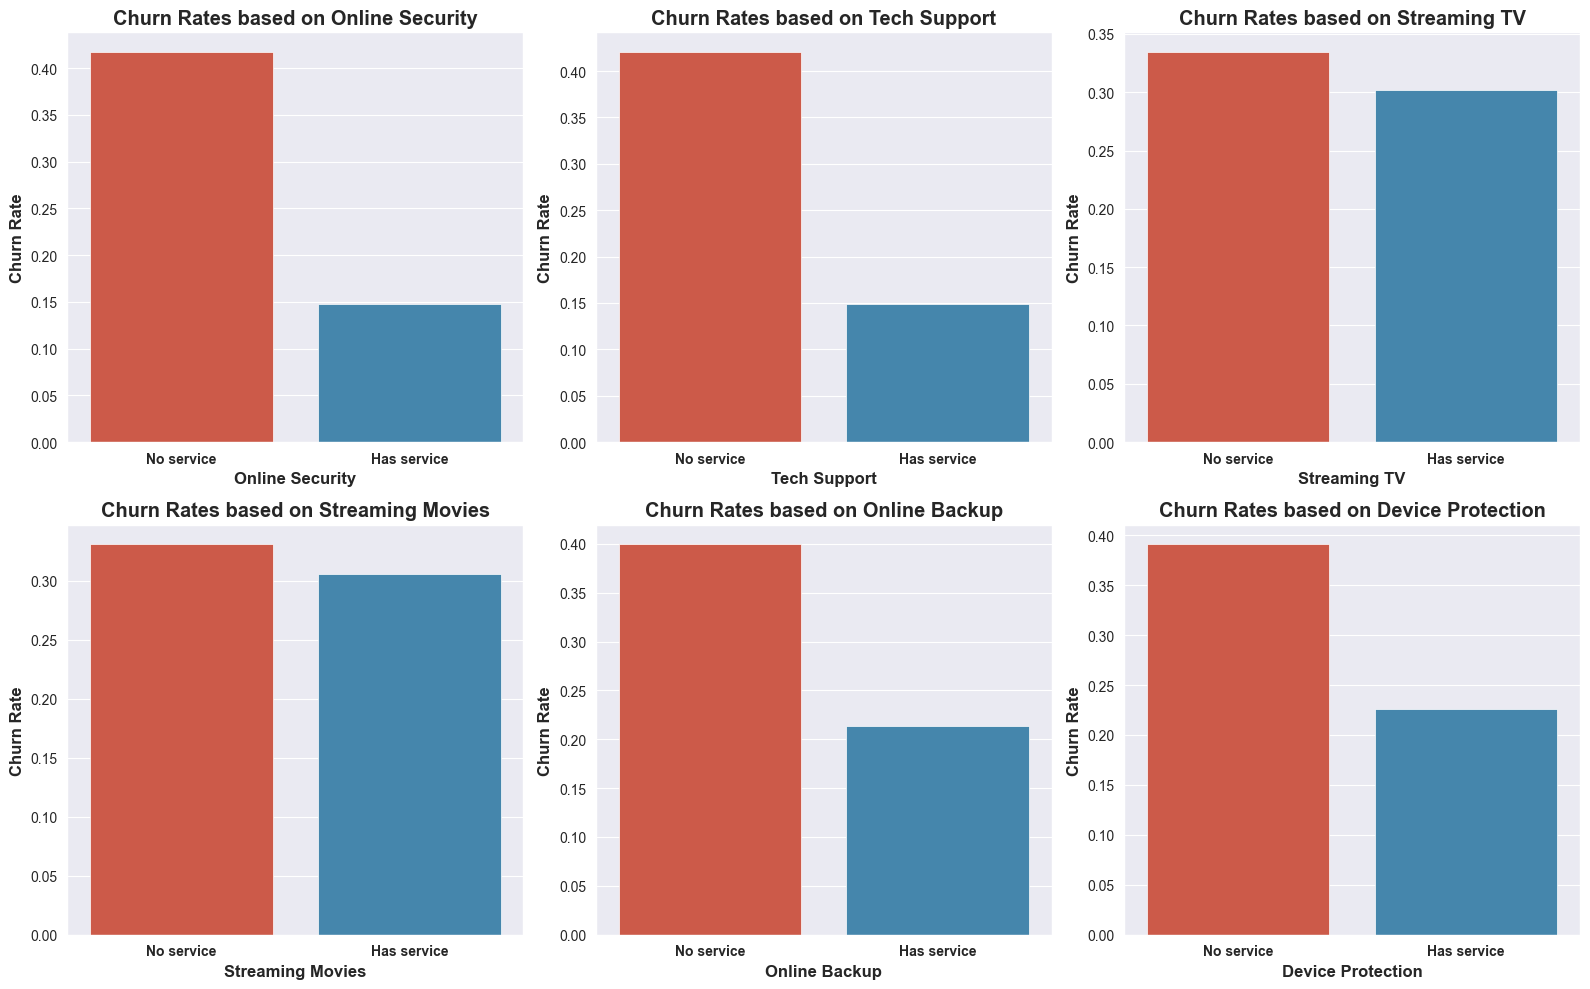

In [133]:
# Plot churn rates for each service
plt.figure(figsize=(16, 10))

plt.subplot(231)
sns.barplot(x=churn_rates_by_OnlineSecurity.index, y=churn_rates_by_OnlineSecurity.values)
plt.title('Churn Rates based on Online Security', weight='bold')
plt.xlabel('Online Security', weight='bold')
plt.ylabel('Churn Rate', weight='bold')
plt.xticks(weight='bold')

plt.subplot(232)
sns.barplot(x=churn_rates_by_TechSupport.index, y=churn_rates_by_TechSupport.values)
plt.title('Churn Rates based on Tech Support', weight='bold')
plt.xlabel('Tech Support', weight='bold')
plt.ylabel('Churn Rate', weight='bold')
plt.xticks(weight='bold')

plt.subplot(233)
sns.barplot(x=churn_rates_by_StreamingTV.index, y=churn_rates_by_StreamingTV.values)
plt.title('Churn Rates based on Streaming TV', weight='bold')
plt.xlabel('Streaming TV', weight='bold')
plt.ylabel('Churn Rate', weight='bold')
plt.xticks(weight='bold')

plt.subplot(234)
sns.barplot(x=churn_rates_by_StreamingMovies.index, y=churn_rates_by_StreamingMovies.values)
plt.title('Churn Rates based on Streaming Movies', weight='bold')
plt.xlabel('Streaming Movies', weight='bold')
plt.ylabel('Churn Rate', weight='bold')
plt.xticks(weight='bold')

plt.subplot(235)
sns.barplot(x=churn_rates_by_OnlineBackup.index, y=churn_rates_by_OnlineBackup.values)
plt.title('Churn Rates based on Online Backup', weight='bold')
plt.xlabel('Online Backup', weight='bold')
plt.ylabel('Churn Rate', weight='bold')
plt.xticks(weight='bold')

plt.subplot(236)
sns.barplot(x=churn_rates_by_DeviceProtection.index, y=churn_rates_by_DeviceProtection.values)
plt.title('Churn Rates based on Device Protection', weight='bold')
plt.xlabel('Device Protection', weight='bold')
plt.ylabel('Churn Rate', weight='bold')
plt.xticks(weight='bold') 

plt.tight_layout()
plt.show()

##### 5. Is there a correlation between the contract term (month-to-month, one year, two years) and churn rates? Are customers on long-term contracts less likely to churn compared to those on month-to-month contracts?

In [134]:
# Calculate churn rates for each contract term
#reset_index() function converts data into a DataFrame and enables visualization

churn_rates_by_contract = df.groupby('Contract')['Churn'].mean().reset_index()
churn_rates_by_contract

,Contract,Churn
0,Month-to-month,0.431487
1,One year,0.115750
2,Two year,0.024272


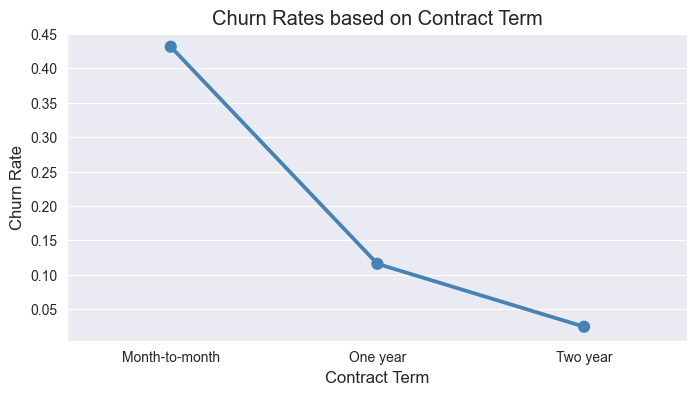

In [135]:
# Create a point plot
plt.figure(figsize=(8, 4))
sns.pointplot(data=churn_rates_by_contract, x='Contract', y='Churn', color='steelblue')
plt.title('Churn Rates based on Contract Term')
plt.xlabel('Contract Term')
plt.ylabel('Churn Rate')
plt.show();

### Splitting of the dataset